In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/krishnadevabhaktuni/Desktop'

In [3]:
cd  '/Users/krishnadevabhaktuni/Desktop/Thinkful'

/Users/krishnadevabhaktuni/Desktop/Thinkful


In [4]:
homeprices = pd.read_csv('homeprices.applied.econ.csv')

In [5]:
#first glance at the data
homeprices.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [6]:
##looking at the type of data
homeprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [7]:
#Checking for missing values
homeprices.isna().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [8]:
#Creating a dataset with aircondition
homes_with_AC = homeprices[(homeprices['airco']== 'yes')]
homes_with_AC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB


In [9]:
#Creating a dataset without AC
homes_without_AC = homeprices[(homeprices['airco']== 'no')]
homes_without_AC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int64
prefarea    373 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 37.9+ KB


(array([ 9., 29., 40., 41., 23., 18.,  7.,  2.,  1.,  3.]),
 array([ 31900.,  47710.,  63520.,  79330.,  95140., 110950., 126760.,
        142570., 158380., 174190., 190000.]),
 <a list of 10 Patch objects>)

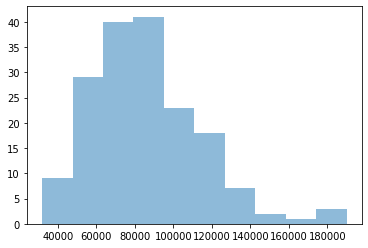

In [10]:
##Checking for Normality
plt.hist(homes_with_AC['price'], alpha = .5)


(array([ 48., 131.,  99.,  50.,  29.,   6.,   4.,   4.,   1.,   1.]),
 array([ 25000.,  40000.,  55000.,  70000.,  85000., 100000., 115000.,
        130000., 145000., 160000., 175000.]),
 <a list of 10 Patch objects>)

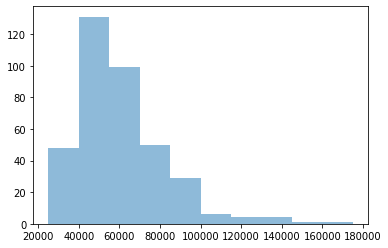

In [11]:
plt.hist(homes_without_AC['price'], alpha = .5)

In [12]:
print(stats.describe(homes_with_AC['price']))
print(stats.describe(homes_without_AC['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [13]:
#removing the homes that have the price above 140000 to achieve normality
ac_homes_filtered = homes_with_AC[(homes_with_AC['price']< 140000)]
ac_homes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 373 to 545
Data columns (total 12 columns):
price       164 non-null float64
lotsize     164 non-null int64
bedrooms    164 non-null int64
bathrms     164 non-null int64
stories     164 non-null int64
driveway    164 non-null object
recroom     164 non-null object
fullbase    164 non-null object
gashw       164 non-null object
airco       164 non-null object
garagepl    164 non-null int64
prefarea    164 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 16.7+ KB


In [17]:
nonac_homes_filtered = homes_without_AC[(homes_without_AC['price']< 140000)]
nonac_homes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 12 columns):
price       371 non-null float64
lotsize     371 non-null int64
bedrooms    371 non-null int64
bathrms     371 non-null int64
stories     371 non-null int64
driveway    371 non-null object
recroom     371 non-null object
fullbase    371 non-null object
gashw       371 non-null object
airco       371 non-null object
garagepl    371 non-null int64
prefarea    371 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 37.7+ KB


In [ ]:
plt.hist(ac_homes_filtered['price'], alpha = 0.5)

In [ ]:
stats.describe(ac_homes_filtered['price'])

In [ ]:
stats.describe(nonac_homes_filtered['price'])

In [ ]:
plt.hist(nonac_homes_filtered['price'], alpha = 0.5)

In [ ]:
stats.ttest_ind(ac_homes_filtered['price'], nonac_homes_filtered['price'])

In [ ]:
#the test statistic is greater than 1.96 and pvalue < 0.05, it appears that there is a significant difference
#between the prices with and without AC

In [18]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(ac_homes_filtered['price'], nonac_homes_filtered['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -26651.244357165444 and -18485.80061029231.'

In [20]:
#With 95% confidence we can say that houseprices without aircondition have on average between 26651 and 18485
#lower than prices with aircondition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


[[Text(0, 0, 'aircon'), Text(0, 0, 'noaircon')]]

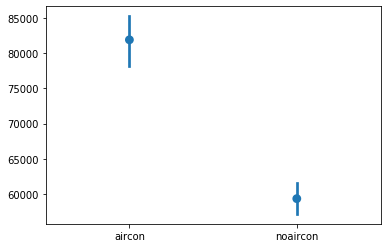

In [21]:
import seaborn as sns

g = sns.pointplot(data=[ac_homes_filtered['price'],
                        nonac_homes_filtered['price']], join=False)
                        
g.set(xticklabels = ['aircon', 'noaircon'])